In [ ]:
!pip install pandas sqlalchemy


In [ ]:
import pandas as pd
import pickle
from sqlalchemy import create_engine
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [ ]:
with open('/content/poupa_dados_reais.txt', 'r', encoding='utf-8') as file:
    reais = file.read()
reais_base = reais.split('-V-')
reais_base

['Demora no atendimento, alguns atendentes mal educados. ',
 '\nFui no posto da Sabesp. Foi rápido e foram bem educados ',
 '\nFui muito bem atendida e o serviço foi muito rápido ',
 '\nSempre fui atendido com rapidez e pontualidade. ',
 '\nAtendimento rápido, ambiente bem ventilado sem muvuca de pessoas, e atendimento com cordialidade ',
 '\nLugar ótimo..mas o serviço deixa a desejar ...sou idosa 65 anos .fui fazer a indendidade vencida ..e não li ...chegando lá com horário marcado ainda bem com 30 minutos de antecedência já no guichê a colaboradora manda eu tirar xerox do lado de fora e quando volto pego fila novamente ..pois a xerox deveria tirar a colaboradora serviço prestado gratuito ..dentro do local...e não a pessoa ter que perder mais tempo para tirar xerox...decepcionada fiquei. ',
 '\nAtendimento rápido para diversos tipos de necessidades. ',
 '\nSuper organizado, ambiente limpo, muito atenciosos e educados, me sento muito bem no ambiente local. ',
 '\nLugar excelente gostei

In [ ]:
df_datas = pd.read_csv('datas_abril.csv')
df_datas

,Datas
0,2024-04-09
1,2024-04-12
2,2024-04-14
3,2024-04-11
4,2024-04-26
5,2024-04-17
6,2024-04-19
7,2024-04-15
8,2024-04-25
9,2024-04-09


In [ ]:
df_comentarios = pd.DataFrame(reais_base, columns=  ['Comentarios'])
df_comentarios

,Comentarios
0,"Demora no atendimento, alguns atendentes mal e..."
1,\nFui no posto da Sabesp. Foi rápido e foram b...
2,\nFui muito bem atendida e o serviço foi muito...
3,\nSempre fui atendido com rapidez e pontualida...
4,"\nAtendimento rápido, ambiente bem ventilado s..."
5,\nLugar ótimo..mas o serviço deixa a desejar ....
6,\nAtendimento rápido para diversos tipos de ne...
7,"\nSuper organizado, ambiente limpo, muito aten..."
8,\nLugar excelente gostei muinto do atendimento...
9,\nLocal limpo e organizado eficiente com ótimo...


In [ ]:
df_comentarios = df_comentarios.applymap(lambda x: x.replace('\n', ' ') if isinstance(x, str) else x)
df_comentarios

,Comentarios
0,"Demora no atendimento, alguns atendentes mal e..."
1,Fui no posto da Sabesp. Foi rápido e foram be...
2,Fui muito bem atendida e o serviço foi muito ...
3,Sempre fui atendido com rapidez e pontualidade.
4,"Atendimento rápido, ambiente bem ventilado se..."
5,Lugar ótimo..mas o serviço deixa a desejar .....
6,Atendimento rápido para diversos tipos de nec...
7,"Super organizado, ambiente limpo, muito atenc..."
8,Lugar excelente gostei muinto do atendimento ...
9,Local limpo e organizado eficiente com ótimos...


In [ ]:
# Carregar o vectorizer
with open('vectorizera.pkl', 'rb') as f:
    vectorizera = pickle.load(f)

# Carregar o modelo
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
freq_reais = vectorizera.transform(reais_base)
preditos = model.predict(freq_reais)
preditos

array(['Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Negativo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Negativo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Negativo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Positivo',
       'Positivo', 'Negativo', 'Negativo', 'Positivo', 'Positivo'],
      dtype='<U8')

In [ ]:
df = pd.DataFrame(preditos, columns=['Preditos'])
df

,Preditos
0,Positivo
1,Positivo
2,Positivo
3,Positivo
4,Positivo
5,Positivo
6,Positivo
7,Positivo
8,Positivo
9,Positivo


In [ ]:
df_semi_final = pd.concat([df_comentarios, df], axis=1)
df_semi_final

,Comentarios,Preditos
0,"Demora no atendimento, alguns atendentes mal e...",Positivo
1,Fui no posto da Sabesp. Foi rápido e foram be...,Positivo
2,Fui muito bem atendida e o serviço foi muito ...,Positivo
3,Sempre fui atendido com rapidez e pontualidade.,Positivo
4,"Atendimento rápido, ambiente bem ventilado se...",Positivo
5,Lugar ótimo..mas o serviço deixa a desejar .....,Positivo
6,Atendimento rápido para diversos tipos de nec...,Positivo
7,"Super organizado, ambiente limpo, muito atenc...",Positivo
8,Lugar excelente gostei muinto do atendimento ...,Positivo
9,Local limpo e organizado eficiente com ótimos...,Positivo


In [ ]:
df_final = pd.concat([df_semi_final, df_datas], axis=1)
df_final

,Comentarios,Preditos,Datas
0,"Demora no atendimento, alguns atendentes mal e...",Positivo,2024-04-09
1,Fui no posto da Sabesp. Foi rápido e foram be...,Positivo,2024-04-12
2,Fui muito bem atendida e o serviço foi muito ...,Positivo,2024-04-14
3,Sempre fui atendido com rapidez e pontualidade.,Positivo,2024-04-11
4,"Atendimento rápido, ambiente bem ventilado se...",Positivo,2024-04-26
5,Lugar ótimo..mas o serviço deixa a desejar .....,Positivo,2024-04-17
6,Atendimento rápido para diversos tipos de nec...,Positivo,2024-04-19
7,"Super organizado, ambiente limpo, muito atenc...",Positivo,2024-04-15
8,Lugar excelente gostei muinto do atendimento ...,Positivo,2024-04-25
9,Local limpo e organizado eficiente com ótimos...,Positivo,2024-04-09


In [ ]:
# Obtendo os nomes dos recursos
nomes_recursos = vectorizera.get_feature_names_out()

# Somando as contagens de cada termo
frequencia_termos = zip(nomes_recursos, freq_reais.sum(axis=0).tolist()[0])


In [ ]:
termos_ordenados = sorted(frequencia_termos, key=lambda x: x[1], reverse=True)


In [ ]:
print("Termos mais associados aos comentários positivos:")
for termo, frequencia in termos_ordenados:
    print(f"{termo}: {frequencia}")


Termos mais associados aos comentários positivos:
atendimento: 25
muito: 21
de: 18
bem: 14
com: 14
que: 13
não: 12
para: 12
fui: 11
do: 9
foi: 9
no: 9
rápido: 9
local: 7
pelo: 7
bom: 6
educados: 6
funcionários: 6
horário: 6
organizado: 6
sem: 6
da: 5
lugar: 5
mas: 5
tudo: 5
ótimo: 5
ambiente: 4
atendida: 4
atendido: 4
eficiente: 4
estava: 4
eu: 4
limpo: 4
marcado: 4
meu: 4
pessoas: 4
por: 4
sempre: 4
serviço: 4
agendamento: 3
atendente: 3
como: 3
demora: 3
excelente: 3
lá: 3
mais: 3
me: 3
minutos: 3
na: 3
público: 3
recomendo: 3
resolver: 3
são: 3
ter: 3
tirar: 3
xerox: 3
agendado: 2
agendar: 2
ainda: 2
as: 2
atendentes: 2
atraso: 2
boa: 2
caso: 2
chegar: 2
cheio: 2
consegui: 2
demais: 2
desejar: 2
dia: 2
em: 2
fazer: 2
fila: 2
fiquei: 2
fácil: 2
gostei: 2
hora: 2
já: 2
minha: 2
muita: 2
nome: 2
pois: 2
problema: 2
rapidez: 2
recepção: 2
se: 2
senha: 2
ser: 2
sou: 2
super: 2
tem: 2
tempo: 2
um: 2
uma: 2
ótimos: 2
15: 1
20: 1
30: 1
50: 1
acho: 1
administração: 1
alguns: 1
ao: 1
apenas: 

In [ ]:
df_freq_words= pd.DataFrame(termos_ordenados)
df_freq_words

,0,1
0,atendimento,25
1,muito,21
2,de,18
3,bem,14
4,com,14
...,...,...
963,órgãos,0
964,ótima,0
965,única,0
966,único,0


In [ ]:
from sqlalchemy import create_engine

# Criar uma conexão com o banco de dados SQLite
engine = create_engine('sqlite:///NLP_SPRINT2.db')

In [ ]:
df_final.to_sql('comentarios', con=engine, if_exists='replace', index=False)

45

In [ ]:
df_freq_words.to_sql('palavras_freq', con=engine, if_exists='replace', index=False)

968

In [ ]:
comentarios = pd.read_sql('SELECT * FROM comentarios ', con=engine)
comentarios

,Comentarios,Preditos,Datas
0,"Demora no atendimento, alguns atendentes mal e...",Positivo,2024-04-09
1,Fui no posto da Sabesp. Foi rápido e foram be...,Positivo,2024-04-12
2,Fui muito bem atendida e o serviço foi muito ...,Positivo,2024-04-14
3,Sempre fui atendido com rapidez e pontualidade.,Positivo,2024-04-11
4,"Atendimento rápido, ambiente bem ventilado se...",Positivo,2024-04-26
5,Lugar ótimo..mas o serviço deixa a desejar .....,Positivo,2024-04-17
6,Atendimento rápido para diversos tipos de nec...,Positivo,2024-04-19
7,"Super organizado, ambiente limpo, muito atenc...",Positivo,2024-04-15
8,Lugar excelente gostei muinto do atendimento ...,Positivo,2024-04-25
9,Local limpo e organizado eficiente com ótimos...,Positivo,2024-04-09


In [ ]:
palavras = pd.read_sql('SELECT * FROM palavras_freq', con=engine)
palavras

,0,1
0,atendimento,25
1,muito,21
2,de,18
3,bem,14
4,com,14
...,...,...
963,órgãos,0
964,ótima,0
965,única,0
966,único,0


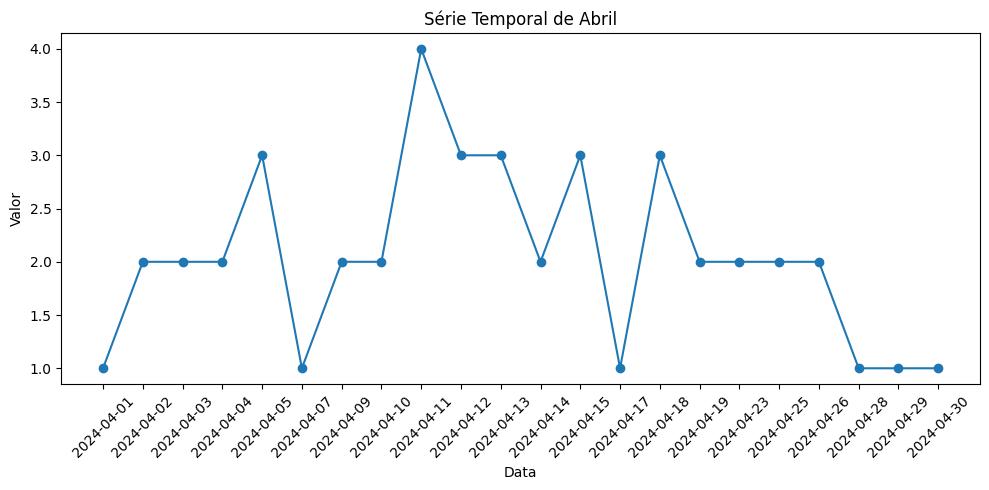

In [ ]:
import matplotlib.pyplot as plt

# Gerar alguns dados fictícios para plotar
import numpy as np


# Plotar a série temporal
plt.figure(figsize=(10, 5))
plt.plot(comentarios.groupby(comentarios['Datas']).size().index, comentarios.groupby(comentarios['Datas']).size().values, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal de Abril')
plt.tight_layout()
plt.show()

In [ ]:
comentarios_positivos = comentarios[comentarios['Preditos'] == 'Positivo']
comentarios_negativos = comentarios[comentarios['Preditos'] == 'Negativo']
comentarios_positivos_diarios = comentarios_positivos.groupby('Datas').size()
comentarios_negativos_diarios = comentarios_negativos.groupby('Datas').size()

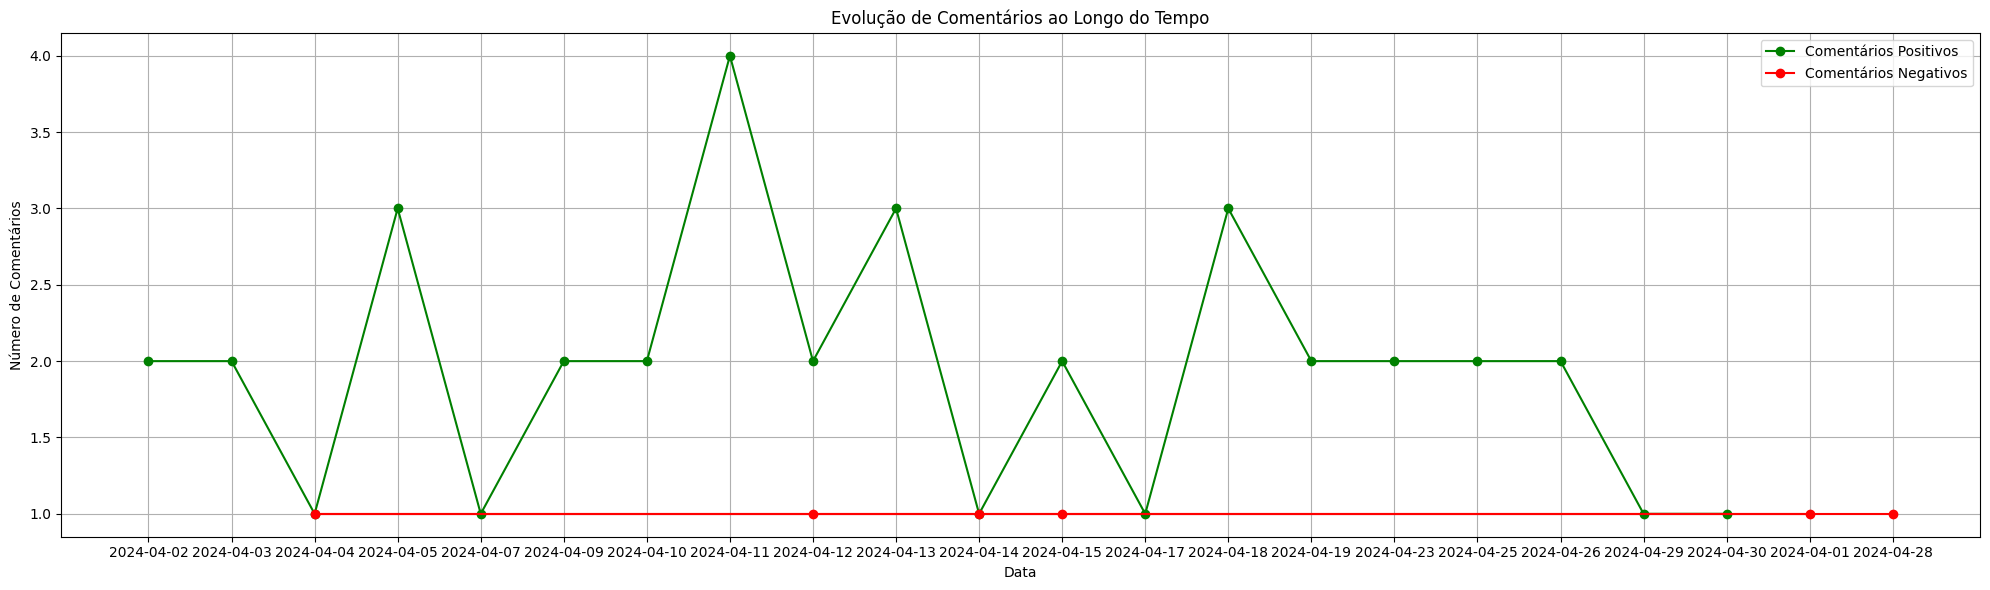

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(comentarios_positivos_diarios.index, comentarios_positivos_diarios.values, marker='o', linestyle='-', color='g', label='Comentários Positivos')
plt.plot(comentarios_negativos_diarios.index, comentarios_negativos_diarios.values, marker='o', linestyle='-', color='r', label='Comentários Negativos')
plt.title('Evolução de Comentários ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Comentários')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

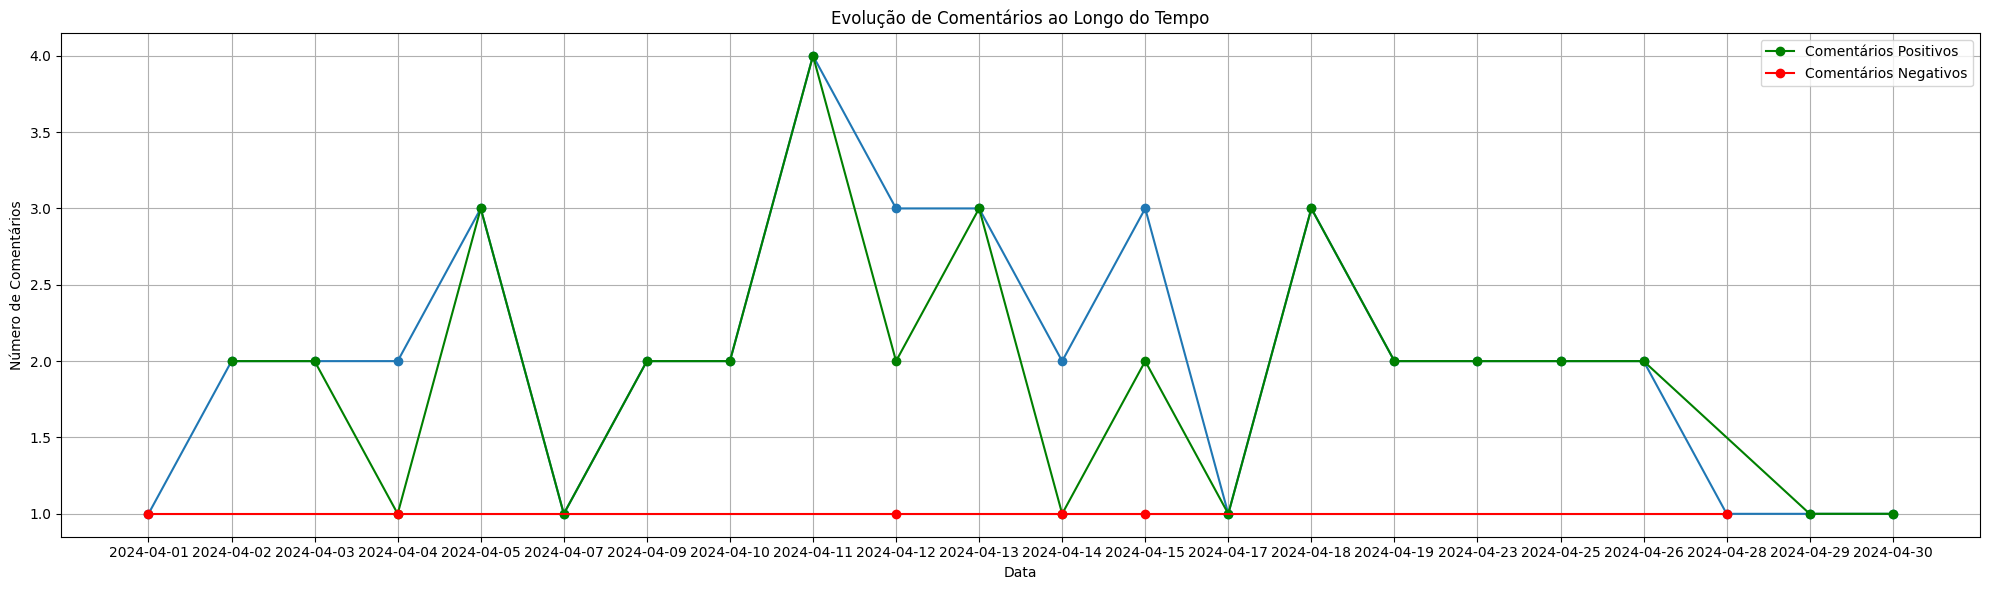

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(comentarios.groupby(comentarios['Datas']).size().index, comentarios.groupby(comentarios['Datas']).size().values, marker='o')
plt.plot(comentarios_positivos_diarios.index, comentarios_positivos_diarios.values, marker='o', linestyle='-', color='g', label='Comentários Positivos')
plt.plot(comentarios_negativos_diarios.index, comentarios_negativos_diarios.values, marker='o', linestyle='-', color='r', label='Comentários Negativos')
plt.title('Evolução de Comentários ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Comentários')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
contagem_comentarios = comentarios['Preditos'].value_counts()
total_comentarios = contagem_comentarios.sum()
proporcao_bons = contagem_comentarios.get('Positivo', 0) / total_comentarios
proporcao_ruins = contagem_comentarios.get('Negativo', 0) / total_comentarios

# Criar uma lista de proporções para o gráfico de barras
proporcoes = [proporcao_bons, proporcao_ruins]

In [ ]:
total_comentarios

45

In [ ]:
contagem_comentarios.get('Negativo', 0)

6

In [ ]:
proporcoes

[0.8666666666666667, 0.13333333333333333]

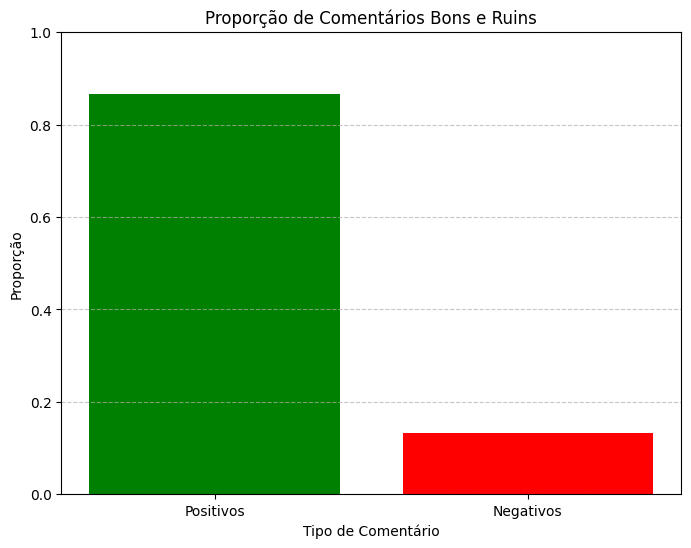

In [ ]:
labels = ['Positivos', 'Negativos']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, proporcoes, color=['green', 'red'])
plt.title('Proporção de Comentários Bons e Ruins')
plt.xlabel('Tipo de Comentário')
plt.ylabel('Proporção')
plt.ylim(0, 1)  # Ajustar o limite do eixo y para garantir que esteja entre 0 e 1
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('portuguese'))

In [ ]:

palavras_sem_stopwords = [palavra for palavra in palavras['0'] if palavra.lower() not in stop_words]

In [ ]:

print("Lista sem stopwords:", palavras_sem_stopwords)

Lista sem stopwords: ['atendimento', 'bem', 'rápido', 'local', 'bom', 'educados', 'funcionários', 'horário', 'organizado', 'lugar', 'tudo', 'ótimo', 'ambiente', 'atendida', 'atendido', 'eficiente', 'limpo', 'marcado', 'pessoas', 'sempre', 'serviço', 'agendamento', 'atendente', 'demora', 'excelente', 'lá', 'minutos', 'público', 'recomendo', 'resolver', 'ter', 'tirar', 'xerox', 'agendado', 'agendar', 'ainda', 'atendentes', 'atraso', 'boa', 'caso', 'chegar', 'cheio', 'consegui', 'demais', 'desejar', 'dia', 'fazer', 'fila', 'fiquei', 'fácil', 'gostei', 'hora', 'muita', 'nome', 'pois', 'problema', 'rapidez', 'recepção', 'senha', 'super', 'tempo', 'ótimos', '15', '20', '30', '50', 'acho', 'administração', 'alguns', 'apenas', 'assentos', 'atenciosos', 'atendem', 'atendeu', 'bebedouro', 'bons', 'calor', 'casa', 'chamar', 'cidadão', 'conversa', 'conversando', 'demorado', 'dentro', 'detran', 'deveria', 'digitais', 'digital', 'documento', 'duas', 'empatia', 'entrada', 'entrega', 'equipe', 'espeta

In [ ]:
len(palavras_sem_stopwords)

870

In [ ]:
df_filtrado = palavras[palavras['0'].isin(palavras_sem_stopwords)].copy()

In [ ]:
df_filtrado

,0,1
0,atendimento,25
3,bem,14
12,rápido,9
13,local,7
15,bom,6
...,...,...
963,órgãos,0
964,ótima,0
965,única,0
966,único,0


In [ ]:
top_palavras = df_filtrado.head(10)
word_freq = {palavra: freq for palavra, freq in zip(top_palavras['0'], top_palavras['1'])}

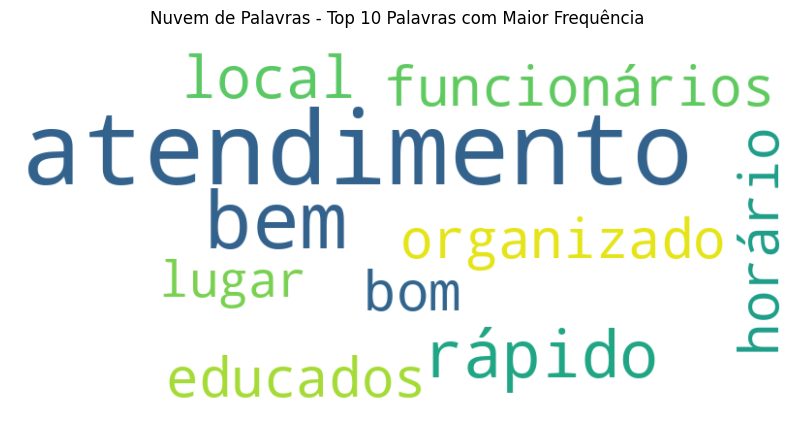

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Top 10 Palavras com Maior Frequência')
plt.show()